# Libs and dataset's describe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (8,5)

In [ ]:
# данные
data = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/titanic/train.csv', index_col=0)
data_test = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/titanic/test.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId** - just index

**Survived** - 1:survived, 0:didn't survived

**Pclass** - what service class has passenger

**Name** - passenger's name

**Sex** - male or female *in feature 1 - female, 0 - male*

**Age** - passenger's age

**SibSp** - # of siblings / spouses aboard the Titanic

**Parch** - # of parents / children aboard the Titanic

**Ticket** - ticket number

**Fare** - payment

**Cabin** - cabin number

**Embarked** - Port of Embarkation C = Cherbourg(France), Q = Queenstown(New Zeland), S = Southampton(England)


In [ ]:
print(data.describe())
print(data.info())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object

# Analyse

Text(0.5, 1.0, 'Percent of Survived')

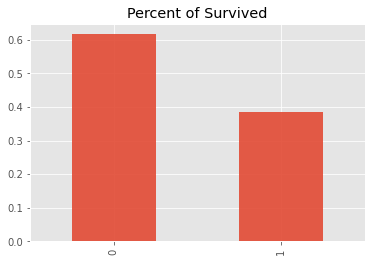

In [ ]:
# percent of survived people and died people
data.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.9)
plt.title('Percent of Survived')

Text(0.5, 1.0, 'Age with regard to Survived')

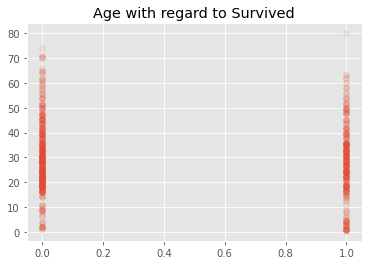

In [ ]:
plt.scatter(data.Survived, data.Age, alpha=0.1)
plt.title('Age with regard to Survived')

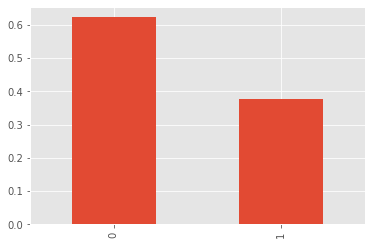

In [ ]:
data.Survived[(data.Age >= 38)].value_counts(normalize=True).plot(kind='bar')

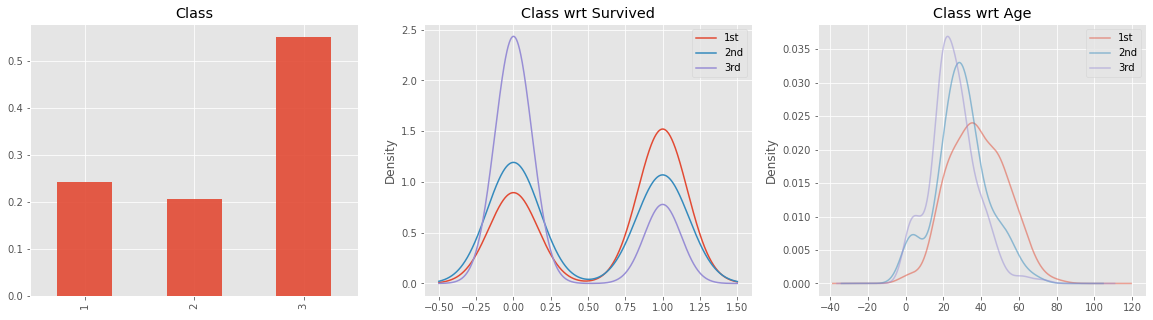

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
data.Pclass.value_counts(normalize=True, sort=False).plot(kind='bar', alpha=0.9)
plt.title('Class')

plt.subplot(1,3,2)
for x in [1,2,3]:
  data.Survived[data.Pclass == x].plot(kind='kde')
plt.title('Class wrt Survived')
plt.legend(('1st','2nd','3rd'))

plt.subplot(1,3,3)
for x in [1, 2, 3]:
  data.Age[data.Pclass == x].plot(kind='kde', alpha=0.5)
plt.title('Class wrt Age')
plt.legend(('1st','2nd','3rd'))

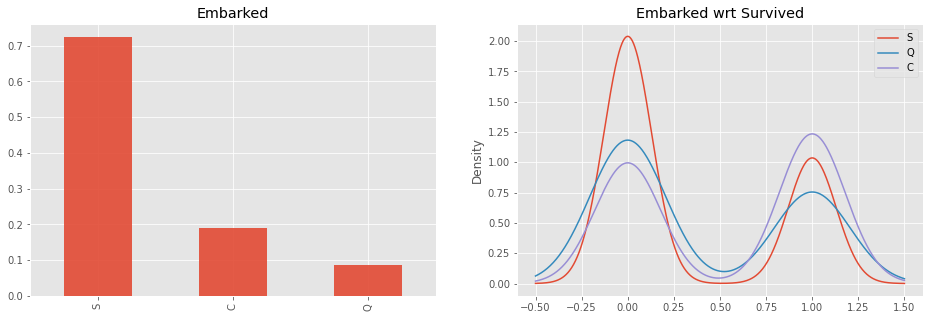

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
data.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.9)
plt.title('Embarked')

plt.subplot(1,2,2)
for x in ['S','Q','C']:
  data.Survived[data.Embarked == x].plot(kind='kde')
plt.title('Embarked wrt Survived')
plt.legend(('S','Q','C'))

Text(0.5, 1.0, 'Comparison Survived by Sex')

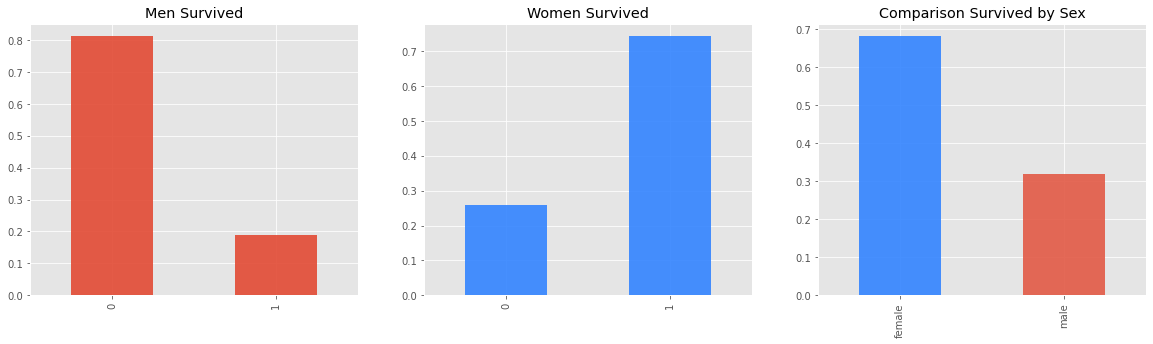

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
data.Survived[data.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.9)
plt.title('Men Survived')

plt.subplot(1,3,2)
data.Survived[data.Sex == 'female'].value_counts(normalize=True, sort=False).plot(kind='bar', color='#3284FF', alpha=0.9)
plt.title('Women Survived')

plt.subplot(1,3,3)
data.Sex[data.Survived == 1].value_counts(normalize=True).plot(kind='bar', color=['#3284FF','#E25945'], alpha=0.9)
plt.title('Comparison Survived by Sex')

Text(0.5, 1.0, 'Poor Women Survived')

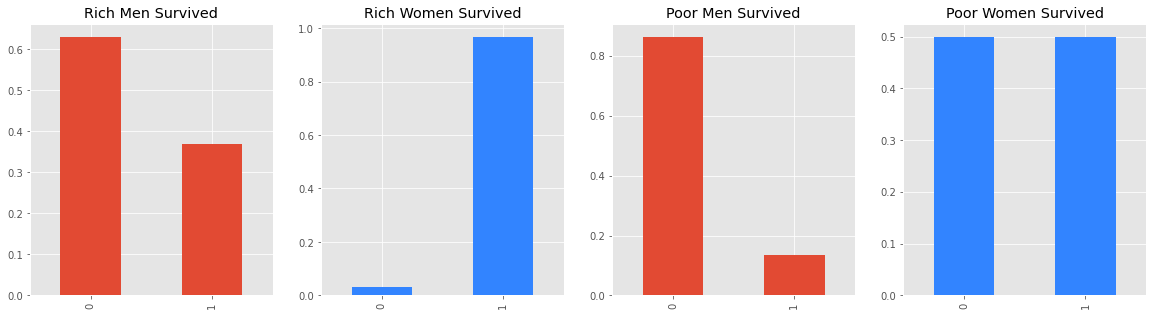

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
data.Survived[(data.Pclass == 1) & (data.Sex =='male')].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.title('Rich Men Survived')

plt.subplot(1,4,2)
data.Survived[(data.Pclass == 1) & (data.Sex =='female')].value_counts(normalize=True, sort=False).plot(kind='bar', color='#3284FF')
plt.title('Rich Women Survived')

plt.subplot(1,4,3)
data.Survived[(data.Pclass == 3) & (data.Sex =='male')].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.title('Poor Men Survived')

plt.subplot(1,4,4)
data.Survived[(data.Pclass == 3) & (data.Sex =='female')].value_counts(normalize=True, sort=False).plot(kind='bar', color='#3284FF')
plt.title('Poor Women Survived')

Text(0.5, 1.0, '')

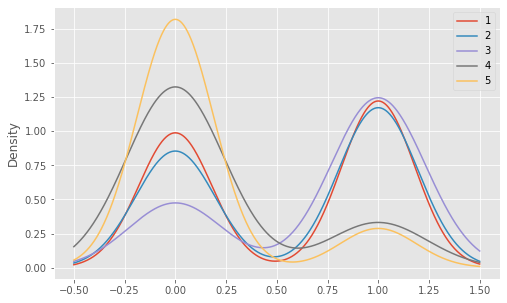

In [ ]:
plt.figure(figsize=(8,5))
for x in range(1,6):
  data.Survived[(data.Parch + data.SibSp == x)].plot(kind='kde')
plt.legend(('1','2','3','4','5'))
plt.title('')

In [ ]:
data.groupby('Survived')['C']

In [ ]:
data.Ticket.value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
3101295              6
                    ..
363592               1
17764                1
STON/O 2. 3101274    1
PC 17609             1
345781               1
Name: Ticket, Length: 681, dtype: int64

# Work with data

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def data_prepare(df):
  # fill NaN in Age
  df.Age.fillna(df.Age.median(), inplace=True)
  # fill NaN in Embarked
  df.Embarked.fillna('S', inplace=True)
  # fill NaN in Fare for test dataset
  df.Fare.fillna(df.Fare.median(), inplace=True)
  # Create title feature by name
  df['title'] = df.Name.str.split(', |\.').str[1]
  df['title_Mr'] = df['title'].apply(lambda x: 1 if x == 'Mr' else 0)
  df['title_Miss'] = df['title'].apply(lambda x: 1 if x == 'Miss' else 0)
  df['title_Mrs'] = df['title'].apply(lambda x: 1 if x == 'Mrs' else 0)
  df['title_Master'] = df['title'].apply(lambda x: 1 if x == 'Master' else 0)
  # Create family feature
  df['family'] = df.SibSp + df.Parch + 1
  df['is_alone'] = df.family.apply(lambda x: 1 if x == 1 else 0)
  # Drop Cabin column
  df.drop('Cabin', axis=1, inplace=True)
  # Drop Name column
  df.drop('Name', axis=1, inplace=True)
  # Drop Ticket column
  df.drop('Ticket', axis=1, inplace=True)
  # Drop title column
  df.drop('title', axis=1, inplace=True)
  # Fare Categories
  df['very_high_fare'] = df['high_fare'] = df['Fare'].apply(lambda x: 1 if x > 120 else 0)
  df['high_fare'] = df['Fare'].apply(lambda x: 1 if (x > 31 and x < 120) else 0)
  df['high_mid_fare'] = df['Fare'].apply(lambda x: 1 if (x > 14 and x < 31) else 0)
  df['mid_fare'] = df['Fare'].apply(lambda x: 1 if (x > 8 and x < 14) else 0)
  df['low_fare'] = df['Fare'].apply(lambda x: 1 if (x > 0 and x < 8) else 0)

In [ ]:
data_prepare(data)

**Analys new features**

Text(0.5, 1.0, 'Low fare wrt Survived')

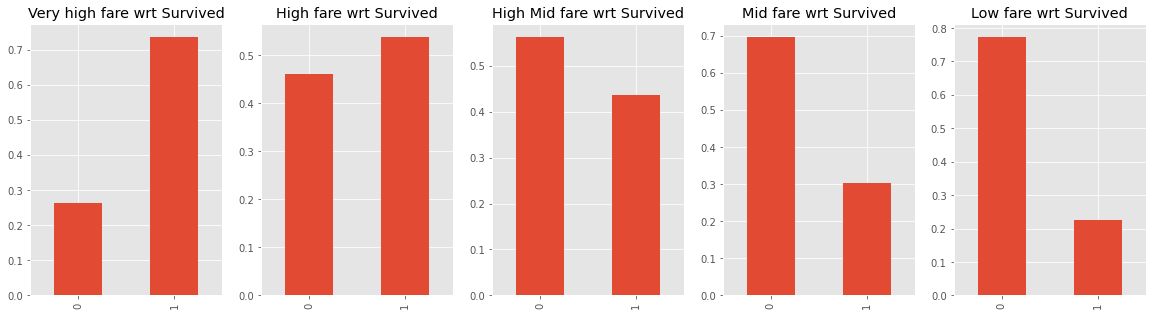

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
data.Survived[data.very_high_fare == 1].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.title('Very high fare wrt Survived')

plt.subplot(1,5,2)
data.Survived[data.high_fare == 1].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.title('High fare wrt Survived')

plt.subplot(1,5,3)
data.Survived[data.high_mid_fare == 1].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.title('High Mid fare wrt Survived')

plt.subplot(1,5,4)
data.Survived[data.mid_fare == 1].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.title('Mid fare wrt Survived')

plt.subplot(1,5,5)
data.Survived[data.low_fare == 1].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.title('Low fare wrt Survived')

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_Mr,title_Miss,title_Mrs,title_Master,family,is_alone,very_high_fare,high_fare,high_mid_fare,mid_fare,low_fare
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,0,0,0,2,0,0,0,0,0,1
2,1,1,female,38.0,1,0,71.2833,C,0,0,1,0,2,0,0,1,0,0,0
3,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1,1,0,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,2,0,0,1,0,0,0
5,0,3,male,35.0,0,0,8.0500,S,1,0,0,0,1,1,0,0,0,1,0


**One hot encoding**

In [ ]:
def ohe_s_e_t(df):
  return pd.get_dummies(df, columns=['Sex','Embarked'])
ohe_sex_embarked_title = ohe_s_e_t(data)
ohe_sex_embarked_title.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,title_Mr,title_Miss,title_Mrs,title_Master,family,is_alone,very_high_fare,high_fare,high_mid_fare,mid_fare,low_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,0,1,0,2,0,0,1,0,0,0,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1,0,2,0,0,1,0,0,0,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1


# Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train test with ohe, sex, embarked, title
X_train_s_e_t, X_test_s_e_t, y_train_s_e_t, y_test_s_e_t = train_test_split(ohe_sex_embarked_title.drop('Survived', axis=1), ohe_sex_embarked_title['Survived'],random_state=42, test_size=0.2)

# Creating model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model_rf = RandomForestClassifier(random_state=42, 
                                  n_estimators=500,
                                  max_depth=6,
                                  )
model_rf.fit(X_train_s_e_t, y_train_s_e_t)

print(cross_val_score(model_rf, X_test_s_e_t, y_test_s_e_t, scoring='accuracy', cv=5))
print(model_rf.score(X_test_s_e_t, y_test_s_e_t))

[0.72222222 0.88888889 0.72222222 0.83333333 0.85714286]
0.8268156424581006


In [ ]:
model_tree = DecisionTreeClassifier(random_state=42,
                                    max_depth=10,
                                    min_samples_split=6,
                                    min_samples_leaf=6)
model_tree.fit(X_train_s_e_t, y_train_s_e_t)
print(cross_val_score(model_tree, X_test_s_e_t, y_test_s_e_t, scoring='accuracy', cv=5).mean())
print(model_tree.score(X_test_s_e_t, y_test_s_e_t))

0.7376190476190476
0.8603351955307262


In [ ]:
model_gb = GradientBoostingClassifier(random_state=42,
                                      max_depth=3,
                                      n_estimators=300,
                                      min_samples_split=20,
                                      min_samples_leaf=20)

model_gb.fit(X_train_s_e_t, y_train_s_e_t)
print(cross_val_score(model_gb, X_test_s_e_t, y_test_s_e_t, scoring='accuracy', cv=5).mean())
print(model_gb.score(X_test_s_e_t, y_test_s_e_t))

0.7880952380952381
0.8268156424581006


In [ ]:
model_mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=300)
model_mlp.fit(X_train_s_e_t, y_train_s_e_t)
print(cross_val_score(model_mlp, X_test_s_e_t, y_test_s_e_t, scoring='accuracy', cv=5).mean())
print(model_mlp.score(X_test_s_e_t, y_test_s_e_t))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7714285714285715
0.7932960893854749


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Predicting

**Prepare test data**

In [ ]:
data_prepare(data_test)

In [ ]:
ohe_sex_embarked_title_pred = ohe_s_e_t(data_test)
ohe_sex_embarked_title_pred.head()

,Pclass,Age,SibSp,Parch,Fare,title_Mr,title_Miss,title_Mrs,title_Master,family,is_alone,very_high_fare,high_fare,high_mid_fare,mid_fare,low_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
893,3,47.0,1,0,7.0000,0,0,1,0,2,0,0,0,0,0,1,1,0,0,0,1
894,2,62.0,0,0,9.6875,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0
895,3,27.0,0,0,8.6625,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
896,3,22.0,1,1,12.2875,0,0,1,0,3,0,0,0,0,1,0,1,0,0,0,1


**Random Forest**

In [ ]:
prediction_rf = model_rf.predict(ohe_sex_embarked_title_pred)

In [ ]:
prediction_rf = pd.DataFrame(prediction_rf, index=data_test.index, columns=['Survived'])
prediction_rf.to_csv('prediction_randfor.csv')

**Gradient Boosting**

In [ ]:
prediction_gb = model_gb.predict(ohe_sex_embarked_title_pred)

In [ ]:
prediction_gb = pd.DataFrame(prediction_gb, index=data_test.index, columns=['Survived'])
prediction_gb.to_csv('prediction_gb.csv')

**MLP**

In [ ]:
prediction_mlp = model_mlp.predict(ohe_sex_embarked_title_pred)

In [ ]:
prediction_mlp = pd.DataFrame(prediction_mlp, index=data_test.index, columns=['Survived'])
prediction_mlp.to_csv('prediction_mlp.csv')

**tree**

In [ ]:
prediction_tree = model_tree.predict(ohe_sex_embarked_title_pred)

In [ ]:
prediction_tree = pd.DataFrame(prediction_tree, index=data_test.index, columns=['Survived'])
prediction_tree.to_csv('prediction_tree.csv')

# Сonclusion


Kaggle Titanic top 8%